# <b>Customer Shopping Analysis 

<h2> <b> Introduction </h2>



<p> This project, "Customer Shopping Analysis," leverages pandas for data processing and analysis, unveiling insights into customer preferences. Matplotlib is employed to craft compelling visuals, offering a clear representation of shopping patterns. The focus lies on age, gender, preferred payment methods, and shopping mall choices, providing valuable information for strategic decision-making in retail. Through this analysis, the project aims to optimize business strategies and enhance the overall shopping experience.<p>


<h4><b>The following questions guided the analysis process for this project, involving visualization and seeking insights:</h4>

<ol>
    <li>Understanding How Gender Influences Shopping</li>  
    <li>Analyzing Category Preferences Among Customers</li> 
    <li>Unpacking Payment Preferences of Customers</li>  
    <li>Examining Shopping Preferences Across Different Malls</li> 
    <li>Tracking Yearly Sales Trends in Malls</li> 
    <li>Analyzing Monthly Shopping Patterns</li>
</ol>

<h4><b>Data Collection</h4>
    
The dataset utilized in this project was sourced from Kaggle and is titled "Customer Shopping Dataset - Retail Sales Data."

<b> About Dataset
<p>Welcome to the shopping world of Istanbul! Our dataset contains shopping information from 10 different shopping malls between 2021 and 2023. We have gathered data from various age groups and genders to provide a comprehensive view of shopping habits in Istanbul.Explore the dataset and discover the fascinating world of Istanbul shopping!<p>

In [69]:
import pandas as pd
from matplotlib import pyplot as plt

In [70]:
customer_shopping=pd.read_csv(r"C:\Users\manis\Downloads\customer_shopping_analysis.csv")

## Data Preprocessing
<p>Data preprocessing is a crucial step in data analysis that involves cleaning and transforming raw data into a format suitable for analysis<p>

Utilize <b>head()</b> and <b>tail()</b> methods for a concise and convenient preview of the first and last five rows in the DataFrame.


In [71]:
customer_shopping.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon


In [72]:
customer_shopping.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
4995,I936915,C281211,Female,54,Clothing,3,900.24,Cash,03-12-2022,Zorlu Center
4996,I167850,C143851,Female,40,Shoes,5,3000.85,Cash,22-12-2022,Metropol AVM
4997,I854893,C752851,Male,34,Shoes,4,2400.68,Cash,27-01-2022,Mall of Istanbul
4998,I436005,C222228,Male,39,Clothing,2,600.16,Debit Card,28-05-2022,Mall of Istanbul
4999,I236679,C494016,Male,31,Food & Beverage,4,20.92,Credit Card,14-10-2021,Metrocity


In [73]:
customer_shopping.isnull().sum() # checking for missing values in the customer_shopping DataFrame

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [74]:
customer_shopping.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [75]:
customer_shopping.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [76]:
# Converting the data type of the "invoice_date" column from float to date to facilitate subsequent analysis.
customer_shopping['invoice_date']=pd.to_datetime(customer_shopping['invoice_date'], format='%d-%m-%Y')

In [77]:
customer_shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      5000 non-null   object        
 1   customer_id     5000 non-null   object        
 2   gender          5000 non-null   object        
 3   age             5000 non-null   int64         
 4   category        5000 non-null   object        
 5   quantity        5000 non-null   int64         
 6   price           5000 non-null   float64       
 7   payment_method  5000 non-null   object        
 8   invoice_date    5000 non-null   datetime64[ns]
 9   shopping_mall   5000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 390.8+ KB


In [78]:
customer_shopping.shape

(5000, 10)

In [79]:
# it is used to generate descriptive statistics of the numerical columns in a DataFrame
customer_shopping.describe()

,age,quantity,price
count,5000.000000,5000.000000,5000.000000
mean,43.616000,3.008800,691.659792
std,14.936237,1.432457,971.386717
min,18.000000,1.000000,5.230000
25%,31.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [80]:
# it provides descriptive statistics for the categorical (object) columns in the DataFrame
customer_shopping.describe(include = 'object')

,invoice_no,customer_id,gender,category,payment_method,shopping_mall
count,5000,5000,5000,5000,5000,5000
unique,5000,5000,2,8,3,10
top,I138884,C241288,Female,Clothing,Cash,Kanyon
freq,1,1,2959,1679,2169,1013


### Analyzing Insights Through Data Exploration and Visualization

<b>1. Understanding How Gender Influences Shopping

In [81]:
# Grouping the data by 'gender' to analyze gender-specific shopping characteristics
gender_distribution = customer_shopping.groupby('gender').agg({'age':'mean','quantity':'sum','price':'sum'}).round()

# Renaming columns for better clarity in the 'gender_distribution' DataFrame
gender_distribution.rename(columns={'age':'Average_Age', 'quantity':'No_Of_Products_Purchased', 'price':'Total_Spend'})


,Average_Age,No_Of_Products_Purchased,Total_Spend
gender,,,
Female,44.0,8910,1953199.0
Male,43.0,6134,1505100.0


<p><i>On average, women tend to spend more and buy more items than men.</p>

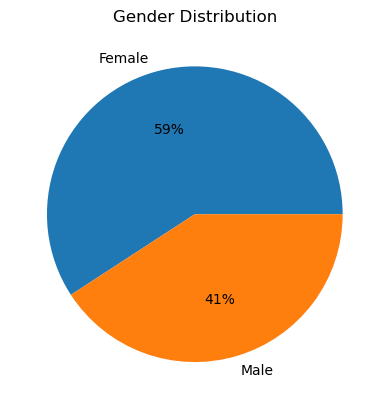

In [82]:
# Creating a DataFrame to capture gender distribution
customers = pd.DataFrame(customer_shopping['gender'].value_counts().reset_index())

# Extracting data for plotting
frequency = customers['gender']
gender = customers['index']

# Plotting a pie chart for gender distribution
plt.pie(frequency, labels=gender, autopct='%1.f%%')
plt.title("Gender Distribution")
plt.show()


<i>Gender distribution analysis indicates a prevalent female majority, guiding potential marketing strategies

<b>2. Analyzing Category Preferences Among Customers

In [83]:
# Grouping by category and aggregating total quantity
category_preference = customer_shopping.groupby('category')['quantity'].sum().reset_index()

# Sorting categories by quantity in descending order
category_preference = category_preference.sort_values(by="quantity", ascending=False)

# Extracting category and quantity data
category = category_preference['category']
quantity = category_preference['quantity']


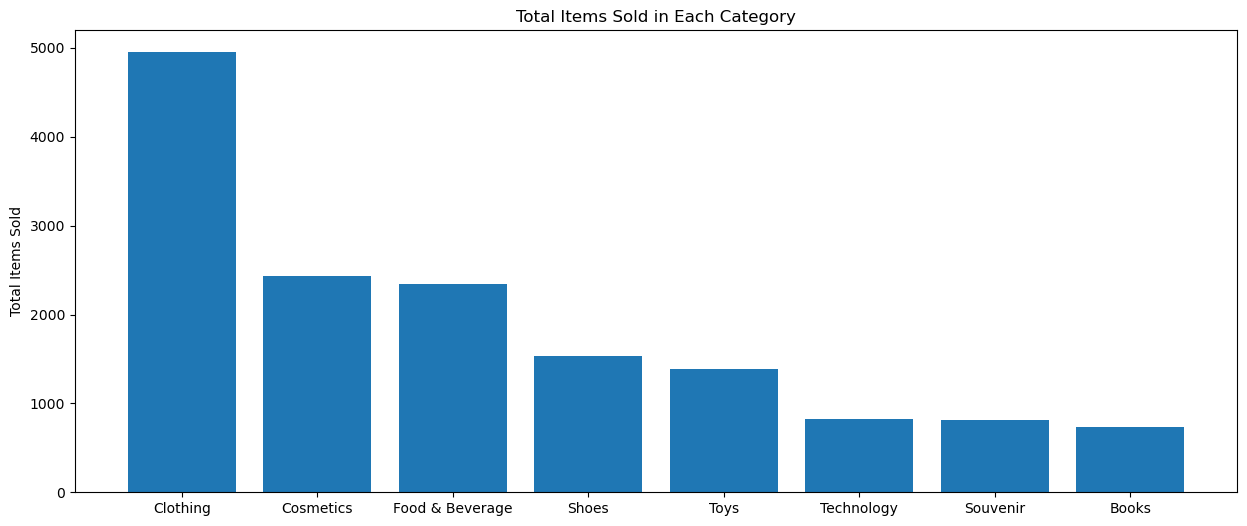

In [84]:
# Plotting a bar chart for category preference
plt.figure(figsize=(15, 6))
plt.bar(category, quantity)
plt.title("Total Items Sold in Each Category")
plt.ylabel("Total Items Sold")
plt.show()

<i>Clothing emerges as the top-sold category, followed by cosmetics and food & beverage, as depicted by the bar chart showing the total items sold in each category

<b>Category Preferences by Gender

In [85]:
# Creating a DataFrame for category-wise quantity analysis by gender
category_by_gender = pd.DataFrame(customer_shopping.groupby(['category', 'gender'])['quantity'].sum().round())

# Renaming the 'quantity' column for clarity
category_by_gender.rename(columns={'quantity': 'No Of Products Purchased'})


No Of Products Purchased
category        gender                          
Books           Female                       388
                Male                         349
Clothing        Female                      2862
                Male                        2089
Cosmetics       Female                      1503
                Male                         933
Food & Beverage Female                      1440
                Male                         908
Shoes           Female                       852
                Male                         683
Souvenir        Female                       526
                Male                         292
Technology      Female                       448
                Male                         380
Toys            Female                       891
                Male                         500

<i>Female customers show a preference for clothing, cosmetics, and food & beverage, while males prioritize clothing, books, and cosmetics, based on category-wise quantity analysis

<b>3. Unpacking Payment Preferences of Customers

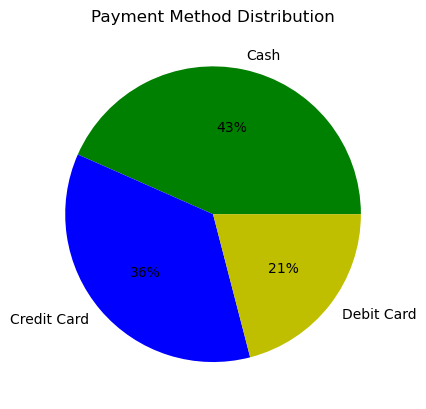

In [86]:
# Creating a DataFrame for payment method distribution
customer_payment = pd.DataFrame(customer_shopping['payment_method'].value_counts().reset_index())

# Extracting data for plotting
frequency = customer_payment['payment_method']
payment_method = customer_payment['index']

# Plotting a pie chart for payment method distribution
plt.pie(frequency, labels=payment_method, autopct='%1.f%%', colors=['g', 'b', 'y'])
plt.title("Payment Method Distribution")
plt.show()


<i>Customer payment preferences exhibit diversity, with a notable preference for cash and credit cards

 <b>4. Examining Shopping Preferences Across Different Malls

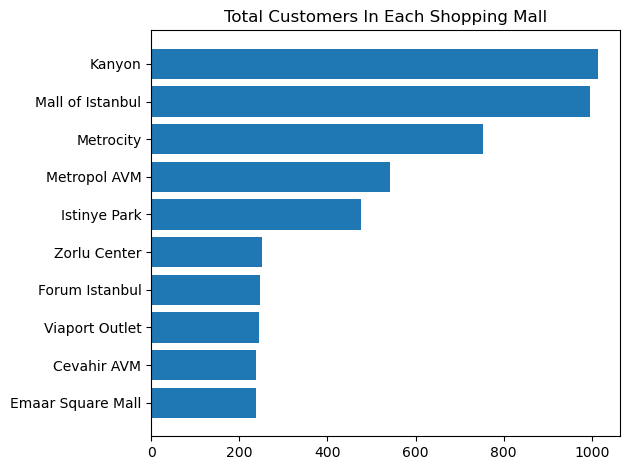

In [87]:
# Creating a DataFrame for total customers in each shopping mall
shopping_mall = pd.DataFrame(customer_shopping.groupby('shopping_mall')['customer_id'].count().sort_values()).reset_index()

# Extracting data for plotting
no_of_customers = shopping_mall['customer_id']
shopping_malls = shopping_mall['shopping_mall']

# Plotting a horizontal bar chart for total customers in each shopping mall
plt.barh(shopping_malls, no_of_customers)
plt.title("Total Customers In Each Shopping Mall")
plt.tight_layout()
plt.show()


<i>Explore a diverse shopping landscape where Kanyon and Mall of Istanbul emerge as prominent destinations, captivating the highest footfall.

<b>5. Tracking Yearly Sales Trends in Malls

In [88]:
# Creating a new DataFrame with a 'Year' column extracted from the 'invoice_date'
yearly_sales = customer_shopping.assign(Year=customer_shopping.invoice_date.dt.year)


In [89]:
# Creating a DataFrame for yearly sales trends in each shopping mall
sales_trend = pd.DataFrame(yearly_sales.groupby(['Year', 'shopping_mall'])['quantity'].sum()).reset_index()

# Extracting unique shopping mall names
shopping_malls = sales_trend['shopping_mall'].unique()

# Filtering sales data for each year
year_1 = sales_trend['Year'] == 2021
year_2 = sales_trend['Year'] == 2022

# Extracting total sales for each year
total_sales_1 = sales_trend['quantity'][year_1]
total_sales_2 = sales_trend['quantity'][year_2]


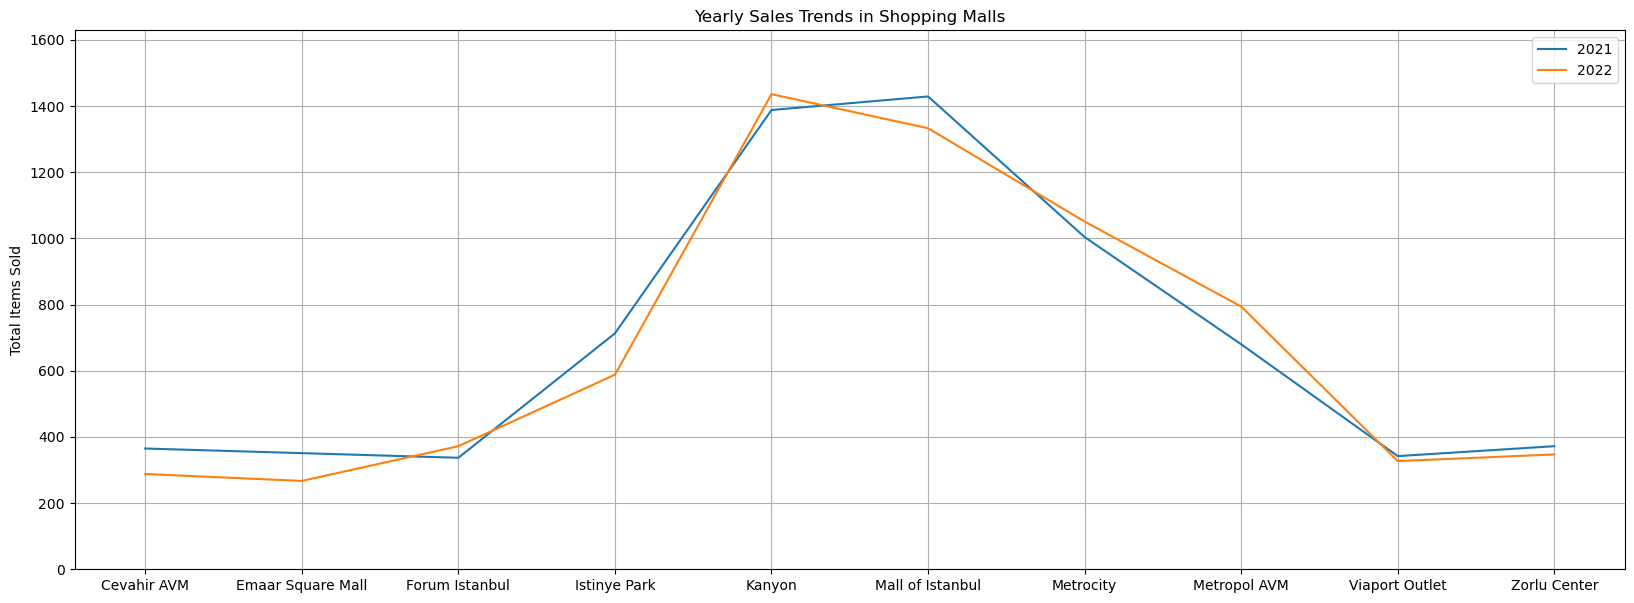

In [90]:
# Plotting yearly sales trends in shopping malls
plt.figure(figsize=(20, 7))
plt.plot(shopping_malls, total_sales_1, label='2021')
plt.plot(shopping_malls, total_sales_2, label='2022')
plt.ylim([0, max(total_sales_1) + 200])
plt.title('Yearly Sales Trends in Shopping Malls')
plt.ylabel('Total Items Sold')
plt.legend()
plt.grid(True)
plt.savefig('Y_mall.png')
plt.show()


<i>The yearly sales trends for 2021 and 2022 unveil a nuanced narrative. Notably, Kanyon and Metropol AVM exhibit an upward trajectory, while Mall of Istanbul encounters a dip. These insights serve as valuable cues for refining marketing strategies

<b> Shopping Mall Sales Frequency by Gender


In [91]:
# Creating a DataFrame for shopping mall sales frequency by gender
shopping_mall_sales = pd.DataFrame(customer_shopping.groupby(['shopping_mall', 'gender'])['quantity'].count())

# Renaming the 'quantity' column for clarity in interpretation
shopping_mall_sales.rename(columns={'quantity': 'frequency'})


frequency
shopping_mall     gender           
Cevahir AVM       Female        141
                  Male           97
Emaar Square Mall Female        140
                  Male           97
Forum Istanbul    Female        159
                  Male           89
Istinye Park      Female        286
                  Male          190
Kanyon            Female        594
                  Male          419
Mall of Istanbul  Female        596
                  Male          400
Metrocity         Female        430
                  Male          323
Metropol AVM      Female        318
                  Male          225
Viaport Outlet    Female        154
                  Male           91
Zorlu Center      Female        141
                  Male          110

<i>The frequency analysis highlights diverse customer engagement across shopping malls, with Kanyon and Mall of Istanbul showing higher participation.

<b> Payment Method Preferences Across Shopping Malls

In [92]:
# Creating a DataFrame for payment method frequency by shopping mall
payment_method_frequency = pd.DataFrame(customer_shopping.groupby(['shopping_mall', 'payment_method'])['quantity'].count())

# Renaming the 'quantity' column for clarity in interpretation
payment_method_frequency.rename(columns={'quantity': 'frequency'})


frequency
shopping_mall     payment_method           
Cevahir AVM       Cash                  116
                  Credit Card            82
                  Debit Card             40
Emaar Square Mall Cash                   82
                  Credit Card           100
                  Debit Card             55
Forum Istanbul    Cash                  109
                  Credit Card            91
                  Debit Card             48
Istinye Park      Cash                  206
                  Credit Card           174
                  Debit Card             96
Kanyon            Cash                  443
                  Credit Card           352
                  Debit Card            218
Mall of Istanbul  Cash                  431
                  Credit Card           359
                  Debit Card            206
Metrocity         Cash                  331
                  Credit Card           270
                  Debit Card            152
Metropol AVM      Cash                  246
                  Credit Card           180
                  Debit Card            117
Viaport Outlet    Cash                  107
                  Credit Card            86
                  Debit Card             52
Zorlu Center      Cash                   98
                  Credit Card            89
                  Debit Card             64

<p><i>The analysis of payment method frequency by shopping mall reveals diverse consumer preferences, with cash being prevalent and credit cards consistently used.</p>
<p><i>This insight informs strategic decisions for optimizing payment options and enhancing the shopping experience.</p>

<b>6. Analyzing Monthly Shopping Patterns

In [93]:
# Assigning a 'months' column to the existing DataFrame based on the 'invoice_date' month
monthly_sales = customer_shopping.assign(months=customer_shopping.invoice_date.dt.month)

# Creating a DataFrame for monthly sales analysis
monthly_sales = pd.DataFrame(monthly_sales.groupby('months')['quantity'].sum()).sort_values(by='quantity', ascending=False)

# Renaming the 'quantity' column to 'Total Items Sold' for clarity in interpretation
monthly_sales.rename(columns={'quantity': 'Total Items Sold'})


,Total Items Sold
months,
1,1614
2,1515
3,1426
10,1253
9,1223
12,1205
11,1203
8,1178
7,1162


<i>The monthly sales analysis reveals peak sales in January, gradually declining thereafter. May registers the lowest sales, suggesting potential seasonal variations in customer shopping behavior

<h3><b>Conclusion:</h3>

<p>The comprehensive analysis of the Customer Shopping Dataset reveals valuable insights into customer preferences and behavior. Gender-specific category preferences indicate that females tend to purchase more items, particularly in categories like Clothing, Cosmetics, and Food & Beverage.


<p>Furthermore, the examination of payment methods across shopping malls highlights a diverse range of preferences, with cash and credit cards being the predominant choices.

<p>The yearly sales trends showcase nuanced dynamics, with Kanyon and Metropol AVM experiencing an upward trajectory, while Mall of Istanbul encounters a dip. Additionally, monthly sales patterns exhibit fluctuations, peaking in January and gradually declining throughout the year.
    
<p>In conclusion, these findings and recommendations provide a robust foundation for informed decision-making, enabling the creation of targeted initiatives to better meet customer needs and drive business success in the dynamic retail landscape.

<i>Thank you for taking the time to read through the entire Jupyter notebook. Your attention and engagement are truly appreciated! If you have any questions or feedback, feel free to reach out my linkedin profile Mani Setharasipalli. Happy analyzing!